<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Heterogeneity Metrics

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy* [e-book]. Zenodo. doi:10.5281/zenodo.15169133 [![DOI](https://zenodo.org/badge/838927017.svg)](https://doi.org/10.5281/zenodo.15169132)  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository* (0.0.1) [Software]. Zenodo. doi:10.5281/zenodo.12667036. GitHub Repository: https://github.com/GeostatsGuy/GeostatsPyDemos [![DOI](https://zenodo.org/badge/777871341.svg)](https://doi.org/10.5281/zenodo.12667035)



```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Heterogeneity Metrics**. 

**YouTube Lecture**: check out my lecture on:

* [Heterogeneity Metrics](https://youtu.be/PG4fn8NPFGA?si=oQrgRmG6DXfHW-41)

These lectures are all part of my [Data Analytics and Geostatistics Course](https://www.youtube.com/playlist?list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation

There is a vast difference in heterogeneity of reservoirs,

* heterogeneity is the change in features over location or time

* conversely, homogeneity is the consistency of variables over location or time 

Heterogeneity impacts the recovery of hydrocarbons from the reservoir, minerals from ore bodies and water from aquifers,

* we need metrics to quantify the heterogeneity in our subsurface data and subsurface models 




##### Applications with Measures of Heterogeneity

* Measures of heterogeneity are often applied proxy, approximate measures to indicate reservoir production / performance.  
* These measures may be applied to compare and rank reservoirs or reservoir model realizations for a single reservoir.  

##### Best Practice

* None of these metrics are perfect.  

* The best result possible from rigorous flow forecasting applied to good, full 3D reservoir models, use the physics when possible!

* Integrate all relevant information, at sufficient scale to resolve important features

###### Caution

* Use of simple heterogeneity measures for ranking reservoir and reservoir models can be dangerous.  

* Inaccuracy can result in incorrect rank estimates; therefore, incorrect business decisions.

###### Other Measures

* We just consider simple, static measures here

* I also have a Python demonstration for [Lorenz coefficient](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/Lorenz_coefficient_demo.ipynb)

* Got your own measure?  You may develop a new metric. Novel methods for quantifying heterogeneity within reservoirs is a currently active area of research.

#### Load the Required Libraries

The following code loads the required libraries.

In [1]:
ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # arrays
import pandas as pd                                           # dataframes
import scipy.stats as stats                                   # statistical functions
import math                                                   # square root to calculate standard deviation from variance
import matplotlib.pyplot as plt                               # plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
import matplotlib.ticker as mtick                             # control tick label formatting
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map
seed = 42                                                     # random number seed

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [2]:
#os.chdir("c:/PGE383/Examples")             # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/PorPermSample1.csv')
df.head()

,Depth,Porosity,Perm
0,0.25,12.993634,265.528738
1,0.50,13.588011,116.891220
2,0.75,8.962625,136.920016
3,1.00,17.634879,216.668629
4,1.25,9.424404,131.594114


#### Feature Engineering

We will need to make a new feature, rock quality index, the ratio of permeability divided by porosity.

In [4]:
df['PermPor'] = df['Perm'].values/df['Porosity'].values
df.head()

,Depth,Porosity,Perm,PermPor
0,0.25,12.993634,265.528738,20.435295
1,0.50,13.588011,116.891220,8.602526
2,0.75,8.962625,136.920016,15.276776
3,1.00,17.634879,216.668629,12.286369
4,1.25,9.424404,131.594114,13.963124


#### Variance of Permeability

It is common to use the sample or population variance. I demonstrate the sample mean. 

\begin{equation}
\sigma_{X_k}^2 = \frac{1}{n} \sum_{i=1}^{n-1} (x_{k,i} - \overline{x_k})^2
\end{equation}

In [5]:
var_perm = np.var(df['Perm'].values,ddof=1)
print('Sample Variance of Permeability: ' + str(np.round(var_perm,2)) + ' mD^2')

Sample Variance of Permeability: 6544.83 mD^2


#### Coefficient of Variation of Permeability

Another common metric is the coefficient of variation, the standard deviation standardized by the mean.

\begin{equation}
C_{v_k} = \frac{\sigma_k}{\overline{k} }
\end{equation}

Note, by specifying the ddof arguement of 1, we are using the sample standard deviation in the calculation.

In [6]:
coefvar_perm = stats.variation(df['Perm'].values,ddof=1)
print('Coefficeint of Variation of Permeability: ' + str(np.round(coefvar_perm,3)) + ' unitless')

Coefficeint of Variation of Permeability: 0.502 unitless


#### Coefficient of Variation of Permeability / Porosity

Also it is common to calculate the coefficient of variation of the rock quality index feature, permeability divided by porosity.

\begin{equation}
C_{v_\frac{k}{\phi}} = \frac{\sigma_{\frac{k}{\phi}}}{\overline{\frac{k}{\phi}} }
\end{equation}

In [7]:
coefvar_permpor = stats.variation(df['PermPor'].values,ddof=1)
print('Coefficient of Variation of Permeability / Porosity: ' + str(np.round(coefvar_permpor,3)) + ' unitless')

Coefficient of Variation of Permeability / Porosity: 0.369 unitless


#### Dykstra Parsons

Now let's calculate the Dykstra-Parsons coefficient. 

\begin{equation}
DP = \frac{P50_k - P16_k}{P50_k}
\end{equation}

In [8]:
P16_perm = np.percentile(df['Perm'].values,16)
P50_perm = np.percentile(df['Perm'].values,50)

print('Permeability P16: ' + str(np.round(P16_perm,3)))
print('Permeability P50: ' + str(np.round(P50_perm,3)))

dp = (P50_perm - P16_perm)/P50_perm
print('\nDykstra-Parsons Coefficient: ' + str(np.round(dp,3)) + ' unitless')

Permeability P16: 84.797
Permeability P50: 144.33

Dykstra-Parsons Coefficient: 0.412 unitless


#### Dykstra-Parsons Improved by Fitting a Lognormal Distribution to Permeability

We may be able to improve our Dykstra-Parsons coefficient calculation by fitting a lognormal distibution to permeability and then using the parametric lognormal distribution to get a more accurate estimate of the P50 and P16 or permeability.

1. calculate the lognormal parameters, \mu (mu) and \sigma (sigma)
2. use the parametric lognormal CDF inverse to get the P50 and P16

In [9]:
mean_perm = np.average(df['Perm'].values)

mu = np.log((mean_perm**2)/math.sqrt(var_perm + mean_perm**2))
sigma = math.sqrt(np.log(var_perm/(mean_perm**2)+1))

print('Lognormal distribution parameters are, mu: ' + str(np.round(mu,2)) + ', and sigma: ' + str(np.round(sigma,2)))

Lognormal distribution parameters are, mu: 4.97, and sigma: 0.47


Now we can calculate the P50 and P16 of permeability from the fit lognormal distribution.

* Note, we could have been more rigorous with our distribution fit with a ordinary least squares or maximum likelihood approach.

In [10]:
P16_perm_lognorm = stats.lognorm.ppf(0.16,s = sigma, scale = math.exp(mu))
P50_perm_lognorm = stats.lognorm.ppf(0.50,s = sigma, scale = math.exp(mu))

print('Permeability P16 from Lognormal Parametric Distribution: ' + str(np.round(P16_perm_lognorm,3)))
print('Permeability P50 from Lognormal Parametric Distribution: ' + str(np.round(P50_perm_lognorm,3)))

Permeability P16 from Lognormal Parametric Distribution: 89.754
Permeability P50 from Lognormal Parametric Distribution: 143.869


In [11]:
dp_lognorm = (P50_perm_lognorm - P16_perm_lognorm)/P50_perm_lognorm
print('\nDykstra-Parsons Coefficient: ' + str(np.round(dp_lognorm,3)) + ' unitless')


Dykstra-Parsons Coefficient: 0.376 unitless


#### Visualize the Lognormal Permeability Parametric Distribution

Let's check our lognormal parametric distribution fit.

* we visualize the lognormal parametric CDF and the permeability data nonparametric distribution together to check the fit

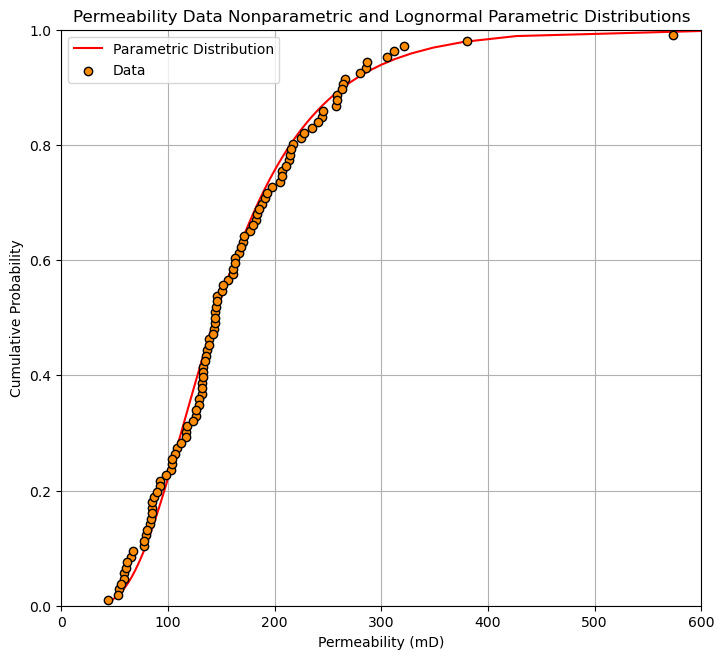

In [12]:
cumul_prob = np.linspace(0.01,0.999,100)
lognormal = stats.lognorm.ppf(cumul_prob,s = sigma, scale = math.exp(mu))

plt.plot(lognormal,cumul_prob,color='red',label='Parametric Distribution',zorder=1)
plt.xlabel('Permeability (mD)'); plt.ylabel('Cumulative Probability'); plt.title('Permeability Data Nonparametric and Lognormal Parametric Distributions')
plt.ylim([0,1]); plt.xlim([0,600]); plt.grid()
plt.scatter(df['Perm'].values,df["Perm"].rank()/(len(df)+1),color='darkorange',edgecolor='black',zorder=10,label='Data')
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.3, hspace=0.4); plt.show()

#### Comments

This is a simple distribution of heterogeneity metrics. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
